# Ex - 2
## BigGIS for BigDATA (Quantum Computing)
### Ashutosh Kumar Jha (Scientist/Engineer SF), IIRS, ISRO
### Sudikin Pramanik (Quantum computing coordinator), Student, IIRS, ISRO
`Concept of Quantum Gates`

# Operators and state_vectors

Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class


### Definition of Quantum Gates
- `X`, `Y`, `Z`, `H`, `S`, and `T` are quantum gates represented as operators.
- These gates are commonly used in quantum computing:
  - `X` is the Pauli-X (or NOT) gate.
  - `Y` is the Pauli-Y gate.
  - `Z` is the Pauli-Z gate.
  - `H` is the Hadamard gate.
  - `S` is the Phase gate.
  - `T` is the T (π/8) gate.

Here’s a brief overview of the matrices used to define these gates:
- **X Gate**:
  $$
  \begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $$
- **Y Gate**:
  $$
  \begin{bmatrix}
  0 & -i \\
  i & 0
  \end{bmatrix}
  $$
- **Z Gate**:
  $$
  \begin{bmatrix}
  1 & 0 \\
  0 & -1
  \end{bmatrix}
  $$
- **Hadamard Gate**:
  $$
  \frac{1}{\sqrt{2}} \begin{bmatrix}
  1 & 1 \\
  1 & -1
  \end{bmatrix}
  $$
- **S Gate**:
  $$
  \begin{bmatrix}
  1 & 0 \\
  0 & i
  \end{bmatrix}
  $$
- **T Gate**:
  $$
  \begin{bmatrix}
  1 & 0 \\
  0 & \frac{1 + i}{\sqrt{2}}
  \end{bmatrix}
  $$

### Quantum State
- `v = Statevector([1, 0])` initializes the quantum state as $ |0\rangle $, represented as a column vector:
  $$
  \begin{bmatrix}1 \\ 0\end{bmatrix}
  $$

### Sequential Application of Gates
- `v = v.evolve(H)` applies the Hadamard gate $ H $ to the state vector $ v $.
- The result of this operation becomes the new state vector.
- This process is repeated with the `T`, `H`, `T`, and `Z` gates, applying each gate in sequence to the updated state vector.

### Final State Vector
- After all the gates are applied in sequence, $ v $ represents the final state of the quantum system.
- `v.draw("text")` provides a textual representation of the final state vector.

### Sequential Application Explained

In quantum computing, gates are applied sequentially to a quantum state. Each gate transforms the state vector according to its matrix representation. When you apply multiple gates, you effectively compute a combined operation, where the final state is influenced by all the gates applied in the given order.

For this specific code:
1. **Initial State**: $$
   \begin{bmatrix}1 \\ 0\end{bmatrix}
   $$
2. **Apply H**: Transforms the state vector.
3. **Apply T**: Further transforms the state.
4. **Apply H**: Applies another Hadamard transformation.
5. **Apply T**: Applies the T gate again.
6. **Apply Z**: Applies the Pauli-Z gate as the final operation.

Each step modifies the quantum state, and the final output is the result of these sequential operations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install qiskit

In [6]:
from numpy import array, matmul, sqrt
from IPython.display import display, Math
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

In [15]:
from qiskit.quantum_info import Operator, Statevector
from math import sqrt

# Define operators
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

# Define initial state
v = Statevector([1, 0])

# Apply operators
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw()
# Draw the statevector
v.draw("latex")


'Statevector([ 0.85355339+0.35355339j, -0.35355339+0.14644661j],\n            dims=(2,))'

Forming a basic quantum circuit

In [10]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

Performing a simple sequential quantum operation

In [11]:
ket0=Statevector([1,0])
v=ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Getting the statistics of the result

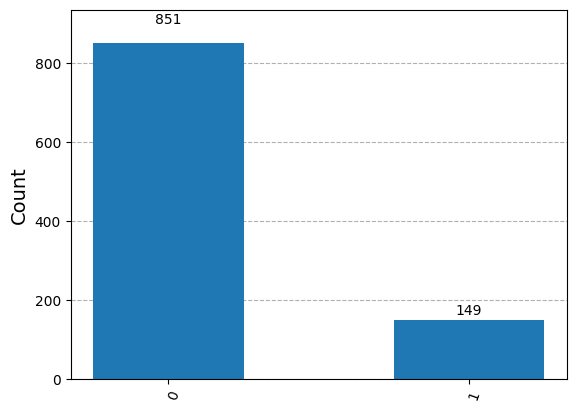

In [12]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)